Pet Sematary: {'sight': 779, 'sound': 212, 'smell': 54, 'taste': 40, 'touch': 255}
The Shining: {'sight': 821, 'sound': 235, 'smell': 63, 'taste': 66, 'touch': 317}


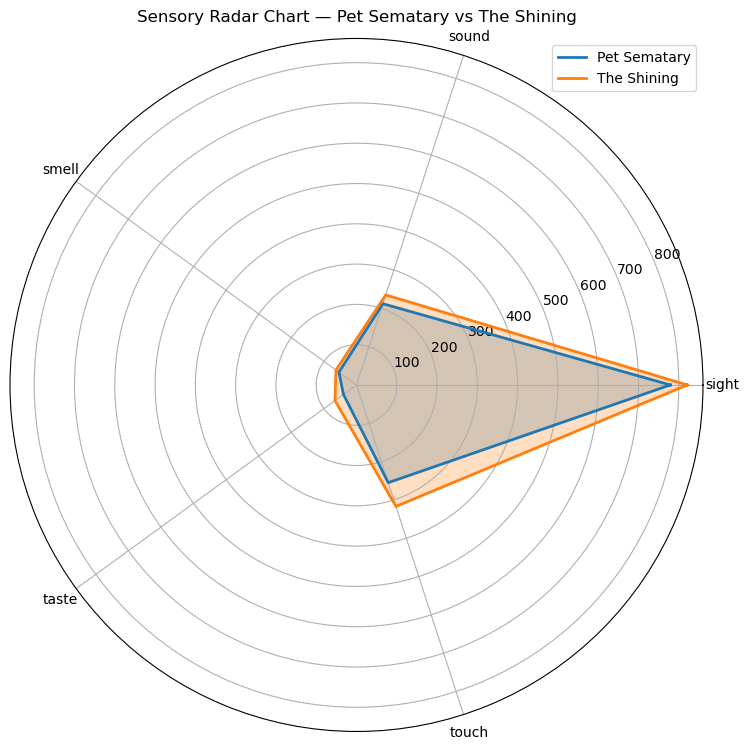


Metaphors — Pet Sematary (first 10):
 ['like a path', 'like a man', 'like a large', 'like a blessing', 'like a goddam', 'like a dog', 'like a big', 'like a tomb', 'like a heart', 'like a play']

Metaphors — The Shining (first 10):
 ['like a corpse', 'like a single', 'like a breaking', 'like a book', 'like a couple', 'like a fuckin', 'like a cat', 'like a knell', 'like a breaking', 'like a beat']

KWIC — Pet Sematary (first 5 sentences):
 ['she never had been easy around the appearances of death (not, he supposed, that anyone really was), probably because of her sister.', 'cats lived violent lives and often died bloody deaths, always just below the usual range of human sight.', 'violent lives, violent deaths.', 'but those were maybe not things to tell your five-year-old daughter, who was for the first time examining the facts of death.', '‘he could be, any time.’ he held her and rocked her, believing, rightly or wrongly, that ellie wept for the very intractability of death, its impervi

In [10]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# LOAD BOOKS
# --------------------------------------------------

base_path = r"C:\Users\dhima\Documents\NLP\NPL_Project\the_books"

pet_text = open(os.path.join(base_path, "PetSematary_updated.txt"), "r", encoding="utf-8", errors="ignore").read().lower()
shining_text = open(os.path.join(base_path, "TheShining_updated.txt"), "r", encoding="utf-8", errors="ignore").read().lower()

books = {
    "Pet Sematary": pet_text,
    "The Shining": shining_text
}

# --------------------------------------------------
# SENSORY WORD LISTS
# --------------------------------------------------

senses = {
    "sight": ["see", "look", "vision", "dark", "light", "shadow", "bright", "glow", "eyes", "color"],
    "sound": ["hear", "heard", "scream", "whisper", "bang", "echo", "noise", "cry", "shout"],
    "smell": ["smell", "odor", "scent", "stench", "fragrance"],
    "taste": ["taste", "bitter", "sweet", "salty", "sour"],
    "touch": ["cold", "warm", "hot", "rough", "smooth", "soft", "hard", "press", "grab", "touch"]
}

# --------------------------------------------------
# COUNT SENSORY WORDS
# --------------------------------------------------

def count_sensory(text, senses):
    counts = {}
    for sense, words in senses.items():
        total = 0
        for w in words:
            total += len(re.findall(r"\b" + re.escape(w) + r"\b", text))
        counts[sense] = total
    return counts

pet_counts = count_sensory(pet_text, senses)
shine_counts = count_sensory(shining_text, senses)

print("Pet Sematary:", pet_counts)
print("The Shining:", shine_counts)

# --------------------------------------------------
# RADAR CHART
# --------------------------------------------------

def radar_chart(d1, d2, labels, name1, name2, color1="#1f77b4", color2="#ff7f0e"):
    categories = list(d1.keys())
    v1 = list(d1.values())
    v2 = list(d2.values())

    v1 += v1[:1]
    v2 += v2[:1]

    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(9,9))
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], categories)

    ax.plot(angles, v1, color=color1, linewidth=2, label=name1)
    ax.fill(angles, v1, color=color1, alpha=0.25)

    ax.plot(angles, v2, color=color2, linewidth=2, label=name2)
    ax.fill(angles, v2, color=color2, alpha=0.25)

    plt.title(f"Sensory Radar Chart — {name1} vs {name2}")
    ax.legend(loc='upper right')
    plt.show()

radar_chart(pet_counts, shine_counts, list(senses.keys()), "Pet Sematary", "The Shining", color1="#1f77b4", color2="#ff7f0e")

# --------------------------------------------------
# METAPHOR EXTRACTION (simple pattern-based)
# --------------------------------------------------

# Common metaphor triggers
metaphor_patterns = [
    r"\blike a [a-zA-Z\s]+?\b",
    r"\bas a [a-zA-Z\s]+?\b",
    r"\bis a [a-zA-Z\s]+?\b",
    r"\bwas a [a-zA-Z\s]+?\b"
]

def extract_metaphors(text, patterns):
    metaphors = []
    for pat in patterns:
        matches = re.findall(pat, text)
        metaphors.extend(matches)
    return metaphors

metaphors = {
    title: extract_metaphors(txt, metaphor_patterns)
    for title, txt in books.items()
}

print("\nMetaphors — Pet Sematary (first 10):\n", metaphors["Pet Sematary"][:10])
print("\nMetaphors — The Shining (first 10):\n", metaphors["The Shining"][:10])

# --------------------------------------------------
# IMPROVED KWIC FUNCTION (sentence-aligned)
# --------------------------------------------------

import nltk
nltk.download('punkt', quiet=True)

from nltk.tokenize import sent_tokenize

def kwic_sentences(text, keyword):
    text = text.replace("\n", " ")
    sentences = sent_tokenize(text)
    results = []
    for s in sentences:
        if keyword.lower() in s.lower():
            results.append(s.strip())
    return results

kwic_results = {
    "Pet Sematary": kwic_sentences(pet_text, "death"),
    "The Shining": kwic_sentences(shining_text, "death")
}

print("\nKWIC — Pet Sematary (first 5 sentences):\n", kwic_results["Pet Sematary"][:5])
print("\nKWIC — The Shining (first 5 sentences):\n", kwic_results["The Shining"][:5])
